<center><img src="img/skillfactorylogo.png"></center>

<h1><center>Курс "Практический Machine Learning"</center></h1>
<h3><center>Шестаков Андрей</center></h3>
<hr>
<h2><center>Задача регрессии</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,12)

from ipywidgets import interact, IntSlider, FloatSlider

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Задача-регрессии" data-toc-modified-id="Задача-регрессии-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задача регрессии</a></div><div class="lev2 toc-item"><a href="#Меры-качества" data-toc-modified-id="Меры-качества-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Меры качества</a></div><div class="lev3 toc-item"><a href="#Стандартные-меры" data-toc-modified-id="Стандартные-меры-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Стандартные меры</a></div><div class="lev3 toc-item"><a href="#Относительные-меры" data-toc-modified-id="Относительные-меры-212"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Относительные меры</a></div><div class="lev3 toc-item"><a href="#Несимметричные-меры" data-toc-modified-id="Несимметричные-меры-213"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Несимметричные меры</a></div><div class="lev3 toc-item"><a href="#Пороговые-меры" data-toc-modified-id="Пороговые-меры-214"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Пороговые меры</a></div><div class="lev1 toc-item"><a href="#KNN-и-деревья-в-регрессии" data-toc-modified-id="KNN-и-деревья-в-регрессии-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>KNN и деревья в регрессии</a></div><div class="lev3 toc-item"><a href="#Метод-ближайшего-соседа" data-toc-modified-id="Метод-ближайшего-соседа-301"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Метод ближайшего соседа</a></div><div class="lev3 toc-item"><a href="#Деревья-решений-для-регрессии" data-toc-modified-id="Деревья-решений-для-регрессии-302"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Деревья решений для регрессии</a></div><div class="lev2 toc-item"><a href="#Исследование-остатков" data-toc-modified-id="Исследование-остатков-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Исследование остатков</a></div><div class="lev2 toc-item"><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Линейная регрессия</a></div><div class="lev3 toc-item"><a href="#Градиентный-спуск" data-toc-modified-id="Градиентный-спуск-321"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Градиентный спуск</a></div><div class="lev2 toc-item"><a href="#Природа-зависимости" data-toc-modified-id="Природа-зависимости-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Природа зависимости</a></div><div class="lev4 toc-item"><a href="#Пример" data-toc-modified-id="Пример-3301"><span class="toc-item-num">3.3.0.1&nbsp;&nbsp;</span>Пример</a></div><div class="lev2 toc-item"><a href="#Ладно,-давайте-дальше-в-sklearn-=)" data-toc-modified-id="Ладно,-давайте-дальше-в-sklearn-=)-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Ладно, давайте дальше в sklearn =)</a></div><div class="lev3 toc-item"><a href="#Переобучениенедообучение,-мультиколлинеарность-и-регуляризация" data-toc-modified-id="Переобучениенедообучение,-мультиколлинеарность-и-регуляризация-341"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Переобучение\недообучение, мультиколлинеарность и регуляризация</a></div><div class="lev2 toc-item"><a href="#Линейная-регрессия-и-выбросы" data-toc-modified-id="Линейная-регрессия-и-выбросы-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Линейная регрессия и выбросы</a></div><div class="lev3 toc-item"><a href="#Robust-Estimators" data-toc-modified-id="Robust-Estimators-351"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Robust Estimators</a></div><div class="lev1 toc-item"><a href="#Добавим-остальные-признаки-в-простую-модель-модель" data-toc-modified-id="Добавим-остальные-признаки-в-простую-модель-модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Добавим остальные признаки в простую модель модель</a></div>

# Задача регрессии

Вспоминаем, что в регрессии восстанавливается вещественная величина - объемы продаж, стоимость дома, количество "лайков" и тп.

Соответственно, нужно использовать как-то измерять ошибку моделей, относительно истинных значений целевой переменной

## Меры качества

Пусть $y^{(i)}$ - значение целевой переменной для $i$-го объекта, а $\hat{y}^{(i)}=a(x^{(i)})$ - её оценка алгоритмом $a(x)$.


### Стандартные меры

Наиболее распространенные меры качества это:

** (R)MSE ((Root) Mean Squared Error) - (Корень из) Среднеквадратичное отклонение**

$$ L(a, y) = \sqrt{\frac{1}{N}\sum\limits_i^N (y^{(i)} - \hat{y}^{(i)})^2}$$

* Штрафует большие ошибки сильней, чем маленькие
* Корень берут, чтобы ошибка измерялась в тех же шкалах, что и целевая переменная

** MAE (Mean Absolute Error) - Среднее абсолютное отклонение**

$$ L(a, y) = \frac{1}{N}\sum\limits_i |y^{(i)} - \hat{y}^{(i)}|$$

* Большая устойчивость к выбросам
* Интуитивно понятна


<center><img src='img/metric-example.png'></center>

Основная критика этих мер заключается в том, что

* MSE и MAE позволяет сравнивать качество моделей между собой, но дают плохое представление о том насколько хорошо решена задача
* Решение с MSE=10
    * может быть плохим, если $y\in [0, 10]$ 
    * хорошим, если $y\in [1000, 1000000]$ 

(0, 400)

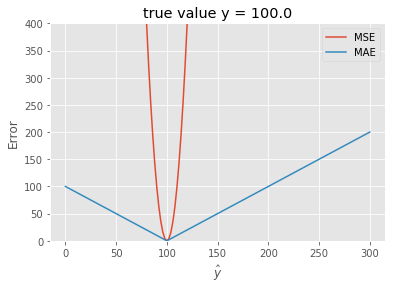

In [12]:
y = 100
y_hat = np.linspace(0, 300, 151)

error1 = (y-y_hat)**2
error2 = abs(y-y_hat)

plt.plot(y_hat, error1, label='MSE')
plt.plot(y_hat, error2, label='MAE')
plt.xlabel('$\hat{y}$')
plt.ylabel('Error')
plt.title('true value y = %.1f' % y)
plt.legend()
plt.ylim(0, 400)

### Относительные меры 

** RSE (Relative Squared Error) - Относительное квадратичное отклонение**

$$ L(a, y) = \sqrt\frac{\sum\limits_i (y^{(i)} - \hat{y}^{(i)})^2}{\sum\limits_i (y^{(i)} - \bar{y})^2}$$

** RAE (Relative Absolute Error) - Относительное абсолютное отклонение (?)**

$$ L(a, y) = \frac{\sum\limits_i |y^{(i)} - \hat{y}^{(i)}|}{\sum\limits_i |y^{(i)} - \bar{y}|}$$

В данном случае, в качестве "бейзлайна" выступает среднее предсказание (или какой-то очень простой алгоритм)

** MAPE (Mean Absolute Persentage Error) - Среднее абсолютное отклонение в процентах **

$$ L(a, y) = \frac{100}{N} \sum\limits_i\frac{\left| y^{(i)} - \hat{y}^{(i)} \right|}{|y^{(i)}|}$$

(0, 10)

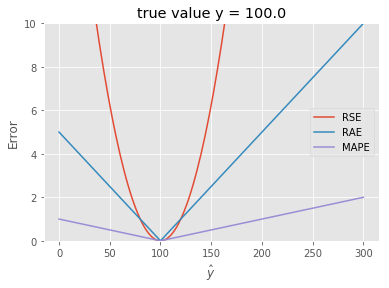

In [13]:
y = 100
y_mean = 80
y_hat = np.linspace(0, 300, 151)

error1 = (y-y_hat)**2/(y-y_mean)**2
error2 = abs(y-y_hat)/abs(y-y_mean)
error3 = abs(y-y_hat)/abs(y)

plt.plot(y_hat, error1, label='RSE')
plt.plot(y_hat, error2, label='RAE')
plt.plot(y_hat, error3, label='MAPE')
plt.xlabel('$\hat{y}$')
plt.ylabel('Error')
plt.title('true value y = %.1f' % y)
plt.legend()
plt.ylim(0, 10)

### Несимметричные меры

** RMSLE (Root Mean Squared Logarithmic Error) - (?!)**

$$ L(a, y) = \sqrt{\frac{1}{N}\sum\limits_i^N(\log(y^{(i)} + 1) - \log(\hat{y}^{(i)} + 1))^2}$$

* Почему мера ошибки модели может быть несимметричной?

(0, 10)

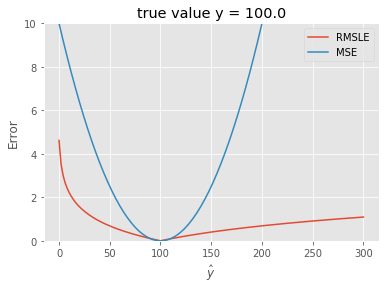

In [14]:
y = 100
y_hat = np.linspace(0, 300, 151)
# log error
error1 = np.sqrt((np.log(y+1) - np.log(y_hat + 1))**2)

# squared error
error2 = (y - y_hat)**2 /1000.

plt.plot(y_hat, error1, label='RMSLE')
plt.plot(y_hat, error2, label='MSE')
plt.xlabel('$\hat{y}$')
plt.ylabel('Error')
plt.title('true value y = %.1f' % y)
plt.legend()
plt.ylim(0, 10)

### Пороговые меры

** Threshold Errors - с точностью до порога**

Бывают кейсы, когда нас не интересует точное значение ошибки. Тогда, например, мы можем считать количество долю случаев, когда отклонение модели превышает некоторый порог $\theta$

$$ L(a, y) = \frac{1}{N}\sum\limits_i \left[ |y^{(i)} - \hat{y}^{(i)}| < \theta \right] $$
$$ L(a, y) = \frac{1}{N}\sum\limits_i \left[ \frac{ |y^{(i)} - \hat{y}^{(i)}|}{ |y^{(i)} - \bar{y}|} < \theta \right] $$


# KNN и деревья в регрессии

### Метод ближайшего соседа

Метод минимально отличается от варианта с классификацией. <br\> По прежнему считаем меру "близости" между объектами, а затем усредняем значения целевого признака у *k* ближайших соседей.

Рассмотрим данные по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя.


In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

In [16]:
df_train = pd.read_csv('data/accord_sedan_training.csv')
df_test = pd.read_csv('data/accord_sedan_testing.csv')
df_train.head()

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


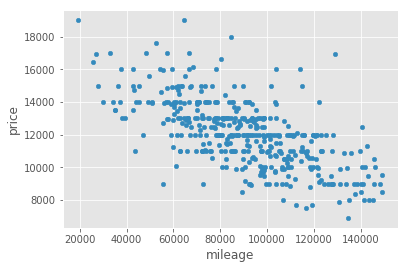

In [17]:
df_train.plot(y='price', x='mileage', kind='scatter')

Посмотроим регрессор на k ближайших соседей.

In [18]:
X_train = df_train.mileage.values.reshape(-1, 1)
y_train = df_train.price.values

X_test = df_test.mileage.values.reshape(-1, 1)
y_test = df_test.price.values

In [19]:
knn = KNeighborsRegressor(n_neighbors=10, 
                          weights='uniform', 
                          metric='manhattan')
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

Text(0,0.5,'price')

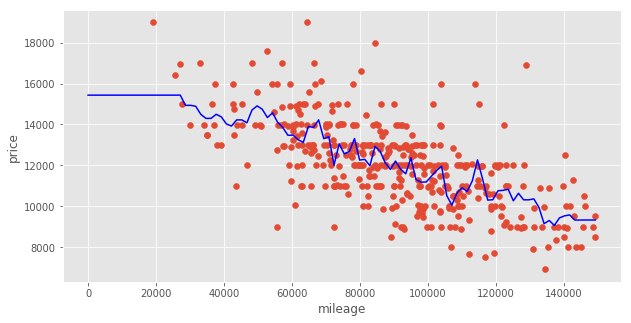

In [20]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = knn.predict(x)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='blue')
plt.xlabel('mileage')
plt.ylabel('price')

In [21]:
def plot_knn(k=5):
    knn = KNeighborsRegressor(n_neighbors=k, weights='uniform', metric='manhattan')
    knn.fit(X_train, y_train)
    
    x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
    y_hat = knn.predict(x)
    plt.xlabel('mileage')
    plt.ylabel('price')

    
    plt.scatter(X_train, y_train, c='r', label='actual data')
    plt.plot(x, y_hat, c='b', label='knn, $k=%d$' % k)
    plt.legend(loc=2)
    
    return None

In [22]:
fig = interact(plot_knn, k=IntSlider(min=1, max=20, value=5))

interactive(children=(IntSlider(value=5, description='k', max=20, min=1), Output()), _dom_classes=('widget-interact',))

### Деревья решений для регрессии

Напомним себе на основе чего строится дерево решений. В каждом новом узле выбирается признак и его значение, максимизирущее прирост определенности в классификации это были 
* miscalssification error
* entropy
* gini

В случае регрессии в качестве меры неопределенности можно рассматривать квадрат отклонения значений целевой переменной относительно среднего в узле
$$I(S) = \frac{1}{|S|} \sum\limits_{i \in S} (y_i - c)^2 $$ 
$$ c = \frac{1}{|S|}\sum\limits_{i \in S} y_i $$

или среднюю абсолютную ошибку относительно медианы

$$I(S) = \frac{1}{|S|} \sum\limits_{i \in S} |y_i - c| $$ 
$$ c = median(\{y_i\}) \ i \in S$$


In [23]:
import subprocess
import os
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

In [24]:
tree = DecisionTreeRegressor(max_depth=2)

In [25]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Text(0,0.5,'price')

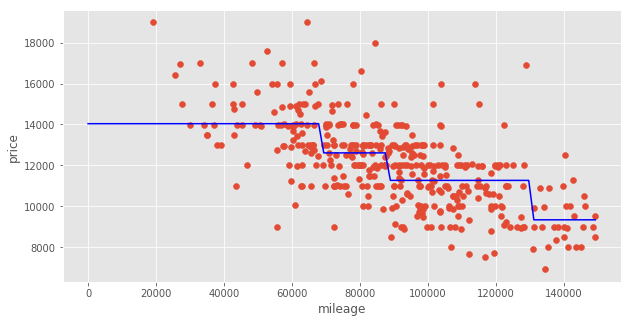

In [26]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = tree.predict(x)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='blue')
plt.xlabel('mileage')
plt.ylabel('price')

In [27]:
def plot_dec_reg(depth=1, criterion='mse', ):
    
    fig, ax = plt.subplots(1,2)
    fig.set_figwidth(20)
    
    x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
    
    tree = DecisionTreeRegressor(criterion=criterion, max_depth=depth)
    tree.fit(X_train, y_train)
    y_hat = tree.predict(x)
    ax[1].set_xlabel('mileage')
    ax[1].set_ylabel('price')
    ax[1].scatter(X_train, y_train, label='actual data')
    ax[1].plot(x, y_hat, c='blue', label='decision tree \nregression')
    ax[1].legend(loc=2)
    
    try:
        with open('tree.dot', 'w') as fout:
            export_graphviz(tree, out_file=fout, feature_names=['mileage'])
        command = ["dot", "-Tpng", "tree.dot", "-o", "tree.png"]
        subprocess.check_call(command)
        ax[0].imshow(plt.imread('tree.png'))
        ax[0].axis("off")
    except:
        pass
    
    plt.show()

In [28]:
fig = interact(plot_dec_reg, depth=IntSlider(min=1, max=5, value=1), criterion=['mse', 'mae'])


interactive(children=(IntSlider(value=1, description='depth', max=5, min=1), Dropdown(description='criterion', options=('mse', 'mae'), value='mse'), Output()), _dom_classes=('widget-interact',))

## Исследование остатков

Остаток - residual

$resid = y - \hat{y}$

Иногда бывает полезно анализировать попарные графики, связанные с остатками модели. Это может помочь найти выбросы и странное поведение модели, понять перепредсказываем ли мы или наоборот - недопредсказываем

In [29]:
def regression_report(X_s, y_s, model, labels, score=mean_absolute_error):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
    ax = ax.flatten()

    colors = plt.cm.jet(np.linspace(0, 1, len(labels)))

    for idx, label in enumerate(labels):
        X = X_s[idx]
        y_true = y_s[idx]

        y_hat = model.predict(X)

        # Scatter
        ax[0].scatter(y_hat, y_true, color = colors[idx], alpha=0.3,
                      label='%s Score - %2.4f' % (label, score(y_true, y_hat)))

        # Resid
        resid = y_true - y_hat
        ax[1].scatter(resid, y_true, color = colors[idx], alpha=0.3, label=label)

        # Distr
        ax[2].hist(y_hat, alpha=0.5, label=label, color = colors[idx], normed=True)

        # Resid
        resid = y_true - y_hat
        ax[3].scatter(resid, y_hat, color = colors[idx], alpha=0.3, label=label)

    ax[0].legend(loc=4)
    ax[0].set_xlabel('$\hat{y}$')
    ax[0].set_ylabel('$y$')

    ax[1].legend(loc=2)
    ax[1].set_xlabel('$resid$')
    ax[1].set_ylabel('$y$')

    ax[2].legend(loc=2)
    ax[2].set_xlabel('$\hat{y}$')

    ax[3].legend(loc=2)
    ax[3].set_xlabel('$resid$')
    ax[3].set_ylabel('$\hat{y}$')

In [30]:
knn = KNeighborsRegressor(n_neighbors=10, 
                          weights='uniform', 
                          metric='manhattan')
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

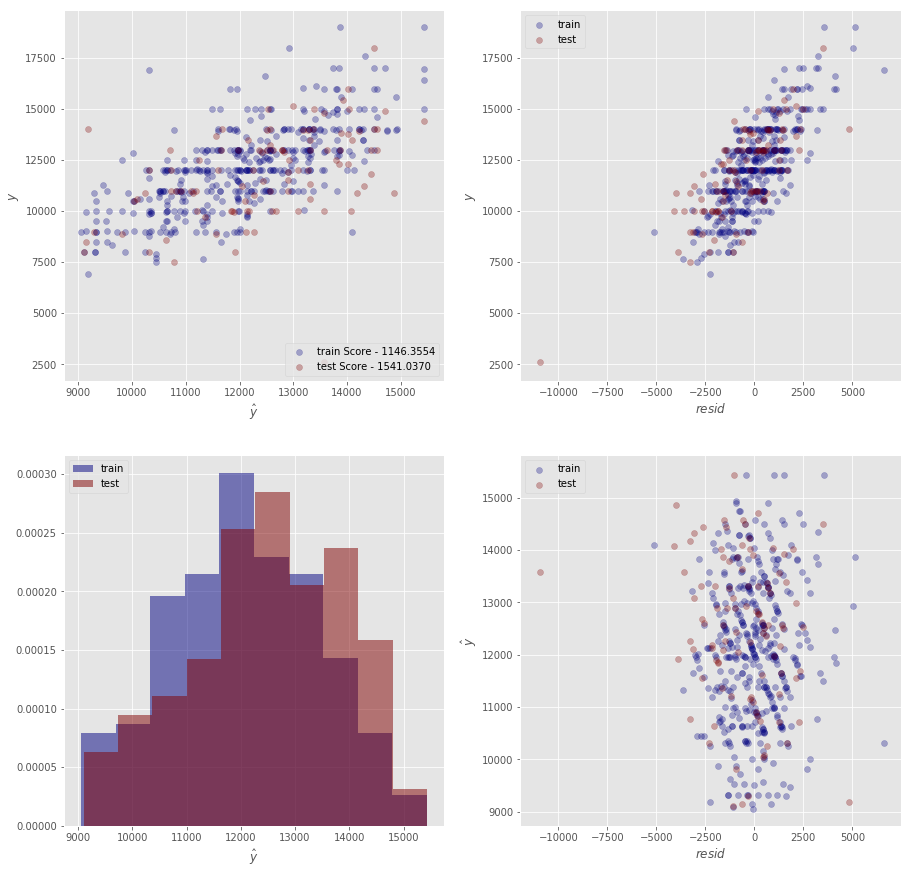

In [31]:
regression_report([X_train, X_test], [y_train, y_test], knn,
                  ['train', 'test'], score=mean_absolute_error)

## Линейная регрессия

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$
То есть необходимо оценить коэффициенты $\beta_i$.

В случае линейной регрессии коэффициенты $\beta_i$ рассчитываются так, чтобы минимизировать сумму квадратов ошибок по всем наблюдениям:
$$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

Как можно найти веса?
* Аналитически
    * Нестабильное решение
    * Долго
* Методами оптимизации (градиентный спуск и др)

### Градиентный спуск

Модель
$$ a(x) = \beta_0 + \beta_1 x_1$$

Функция потерь:
$$ L(\beta_0, \beta_1) = \frac{1}{2n}\sum_{i=1}^n(\beta_0 + \beta_1x_1^{(i)} - y^{(i)})^2$$ 

* Предположим мы выбрали какое-то начальное приближение $(\hat{\beta_0}, \hat{\beta_1})$
* Его можно постараться улучшить - надо двигаться в сторону наискорейшего убывания функции (Антиградиента!)

In [32]:
from stuff import sq_loss_demo, grad_demo, stoch_grad_demo, gradient_descent_upd, stoch_gradient_descent

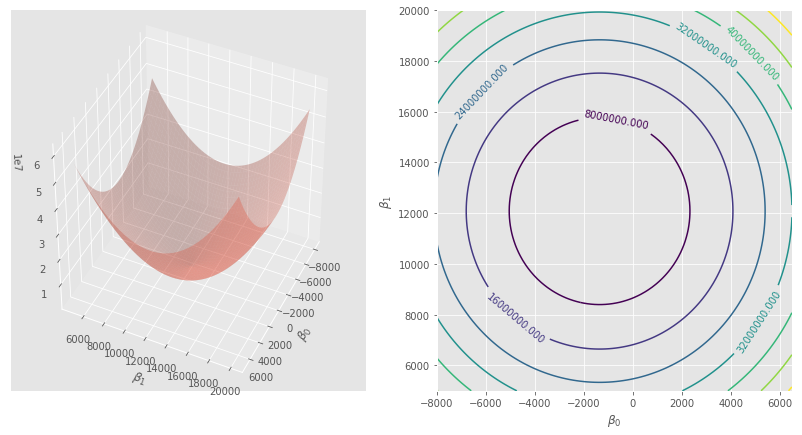

In [33]:
sq_loss_demo(df_train)

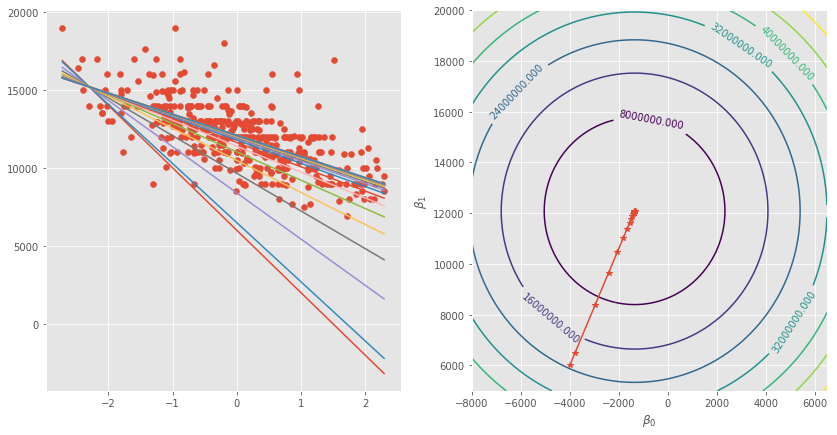

In [34]:
grad_demo(df_train, iters=105, alpha=0.08)

## Природа зависимости

Далеко не всегда переменные зависят друг от друга именно в том виде, в котором они даны. Никто не запрещает зависимость вида
$$\log(y) = \beta_0 + \beta_1\log(x_1)$$
или
$$y = \beta_0 + \beta_1\frac{1}{x_1}$$
или
$$y = \beta_0 + \beta_1\log(x_1)$$
или
$$y = \beta_0 + \beta_1 x_1^2 + \beta_2 x_2^2 + \beta_3 x_1x_2 $$
и т.д.

Не смотря на то, что могут возникать какие-то нелинейные функции - всё это сводится к **линейной** регрессии (например, о втором пункте, произведите замену $z_1 = \frac{1}{x_1}$)

#### Пример

Загрузите данные `weights.csv` c информацией о весах мозга и тел различных биологических видов. Вес тела задан в килограммах, вес могза в граммах.

In [35]:
df = pd.read_csv('data/weights.csv', sep=';', index_col=0)
df.head()

,body_w,brain_w
species,,
Mountain Beaver,1.35,8.1
Cow,465.00,423.0
Grey Wolf,36.33,119.5
Goat,27.66,115.0
Guinea Pig,1.04,5.5


In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()

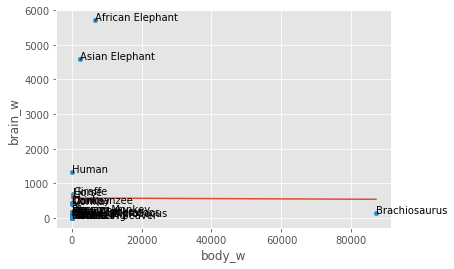

In [38]:
df.plot(x = 'body_w', y='brain_w', kind='scatter')
for k, v in df.iterrows():
    plt.annotate(k, v[:2])

X = df.body_w.values.reshape(-1,1)
y = df.brain_w.values
model.fit(X, y)

x_range = np.linspace(X.min(), X.max(), 10).reshape(-1, 1)
y_hat = model.predict(x_range)
plt.plot(x_range, y_hat)

Теперь давайте возьмем логарифм от обеих переменных и снова нарисуем их на графике

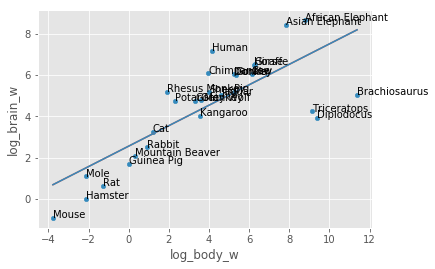

In [39]:
df['log_body_w'] = np.log(df.body_w)
df['log_brain_w'] = np.log(df.brain_w)
df.plot(x = 'log_body_w', y='log_brain_w', kind='scatter')
for k, v in df.iterrows():
    plt.annotate(k, v[2:])
    
X = df.log_body_w.values.reshape(-1,1)
y = df.log_brain_w.values
model.fit(X, y)
    
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_hat = model.predict(x_range)
plt.plot(x_range, y_hat)

y_hat = model.predict(x_range)
plt.plot(x_range, y_hat)

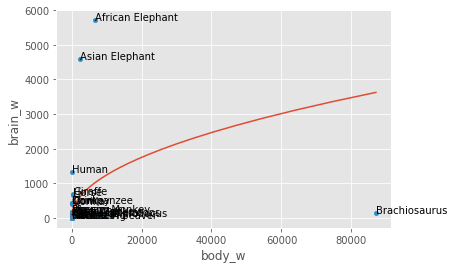

In [40]:
# Вернемся к начальным координатам

x_range = np.exp(x_range)
y_hat = np.exp(y_hat)

df.plot(x = 'body_w', y='brain_w', kind='scatter')
for k, v in df.iterrows():
    plt.annotate(k, v[:2])

plt.plot(x_range, y_hat)

## Ладно, давайте дальше в sklearn =)

In [46]:
X_train = df_train.mileage.values.reshape(-1, 1)
y_train = df_train.price.values

In [47]:
from sklearn.linear_model import LinearRegression

Обучим модель

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
print('Model:\nprice = %.2f + (%.2f)*mileage' % (model.intercept_, model.coef_[0]))

Model:
price = 16762.02 + (-0.05)*mileage


Нарисуем решение

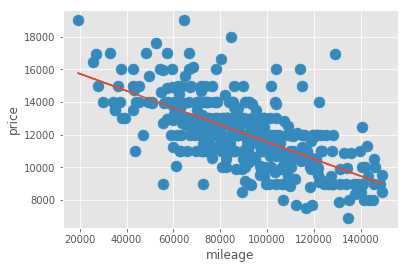

In [50]:
df_train.plot(x='mileage', y='price', kind='scatter', s=120)

y_hat = model.predict(X_train)
plt.plot(X_train, y_hat)

### Переобучение\недообучение, мультиколлинеарность и регуляризация

Одна из важнейших характеристик моделей, будь то линейная регрессия, наивные Байес и др. - их **обобщающая способность**.
Наша задача не построить "идеальную" модель, на имеющихся у нас наблюдениях, которая идеально их будет предсказывать, но и применять эту модель для новых данных.

Ниже приводятся примеры 3х моделей.

<img src=http://www.holehouse.org/mlclass/10_Advice_for_applying_machine_learning_files/Image%20%5B8%5D.png>
[Andrew's Ng Machine Learning Class - Stanford]

Второй момент, который важен для линейных моделей - **мультиколлинеарность**. Этот эффект возникает, когда пара предикторов  близка к взаимной линейной зависимости (коэффициент корреляции по модулю близок к 1). Из-за этого:

* Не существует аналитического решения
* Зависимость $y = \beta_0 + \beta_1x_1 + \beta_2x_2$ перестаёт быть одназначной (падает интерпретируемость модели)

С этим эффектом можно бороться несколькими способами

* Последовательно добавлять переменные в модель
* Исключать коррелируемые предикторы

В обоих случаях может помочь **регуляризация** - добавление штрафного слагаемого за сложность модели в функцию потерь. В случае линейной регрессии было:
$$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 $$
Стало (Ridge Regularization)
$$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\left[ \sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 \right] + \lambda\sum_{j=1}^{m}\beta_j^2$$
или (Lasso Regularization)
$$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\left[ \sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 \right] + \lambda\sum_{j=1}^{m}|\beta_j|$$

Добавим в модель ложную переменную - пробег в километрах (в милях он у нас ужее есть)

In [36]:
df_train.loc[:, 'kms'] = df_train.mileage*1.6
df_test.loc[:, 'kms'] = df_test.mileage*1.6

In [37]:
X_train = df_train.loc[:, ['mileage', 'kms']]
y_train = df_train.price.values

X_test = df_test.loc[:, ['mileage', 'kms']]
y_test = df_test.price.values

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([-0.01464444, -0.02343111])

In [39]:
mean_absolute_error(y_test, model.predict(X_test))

1434.4337332279733

In [40]:
from sklearn.linear_model import Lasso

In [41]:
model = Lasso(alpha=1.)
model.fit(X_train, y_train)
model.coef_

array([ -5.21342088e-02,  -6.97341998e-10])

In [42]:
mean_absolute_error(y_test, model.predict(X_test))

1434.4337311578297

## Линейная регрессия и выбросы

Квадратичная ошибка достаточно чувствительна к выбросам. Давайте добавим выбросы.

Посмотрим, как поведет себя простая линейная регрессия.

In [43]:
X_train = df_train.mileage.values.reshape(-1, 1)
y_train = df_train.price.values

n = y_train.shape[0]

Добавляем выброс(-ы)

In [45]:
# Выполним ящейку несколько раз, чтобы добавить выбросы
X_train = np.r_[X_train, [[250000+np.random.rand()*10000]]]
y_train = np.r_[y_train, 16000+np.random.randn()*1000]

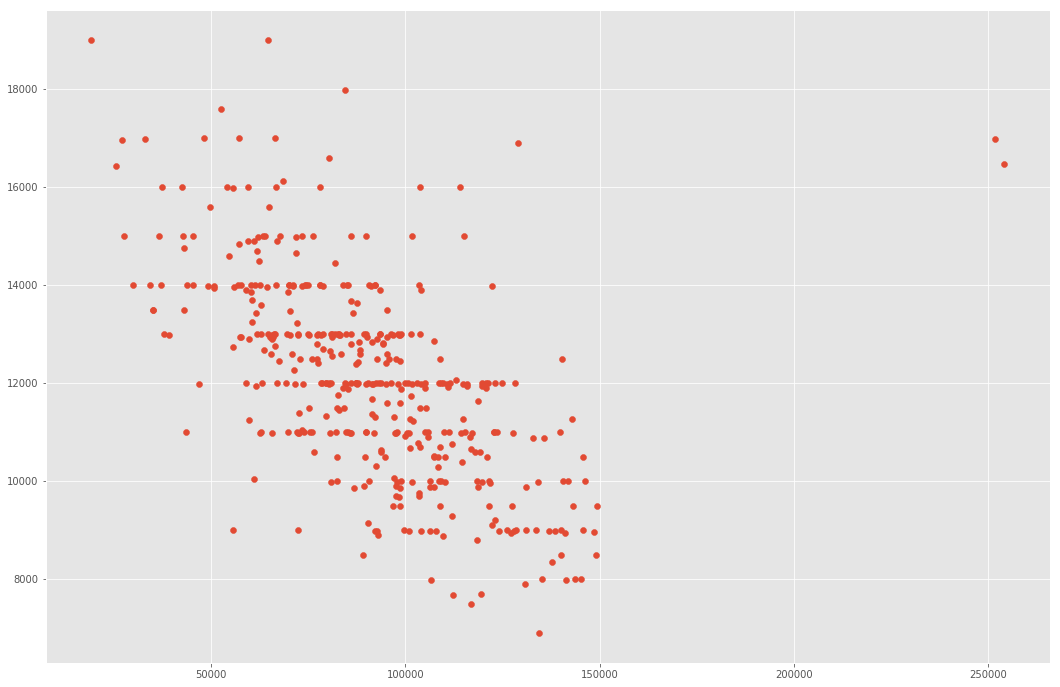

In [46]:
plt.scatter(X_train, y_train)

 Обучим 2 модели. Первая - на данных без выбросов. Вторая - на всех данных

In [47]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train[:n], y_train[:n])

model_ouliers = LinearRegression(fit_intercept=True)
model_ouliers.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

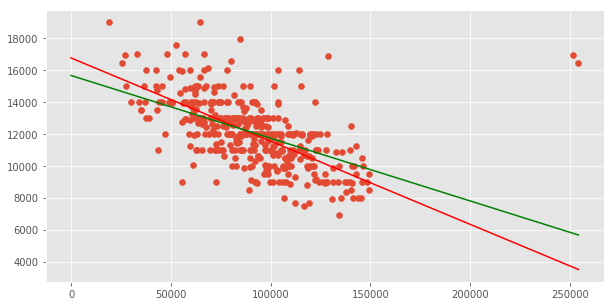

In [48]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = model.predict(x)
y_hat_outliers = model_ouliers.predict(x)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='red')
ax.plot(x, y_hat_outliers, c='green')

### Robust Estimators

Идея робастных методов заключается во взвешивании остатков модели таким образом, чтобы большие значения вносили меньший вклад в оценку параметров.

Таким образом, вместо минимизации квадрата остатков $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2$$
Будут минимизироваться взвешенные остатки $$ L_w(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}\rho_i \cdot (\hat{y}^{(i)} - y^{(i)})^2,$$
где $\rho_i$ - некоторый вес, которые будет большой для объектов с малой ошибкой и малым для объектов с высокой ошибкой

Для того, чтобы попробовать эти методы нужно будет устновить пакет `statsmodels` через `pip`

In [49]:
import statsmodels.api as sm

(0.1, -4.1)

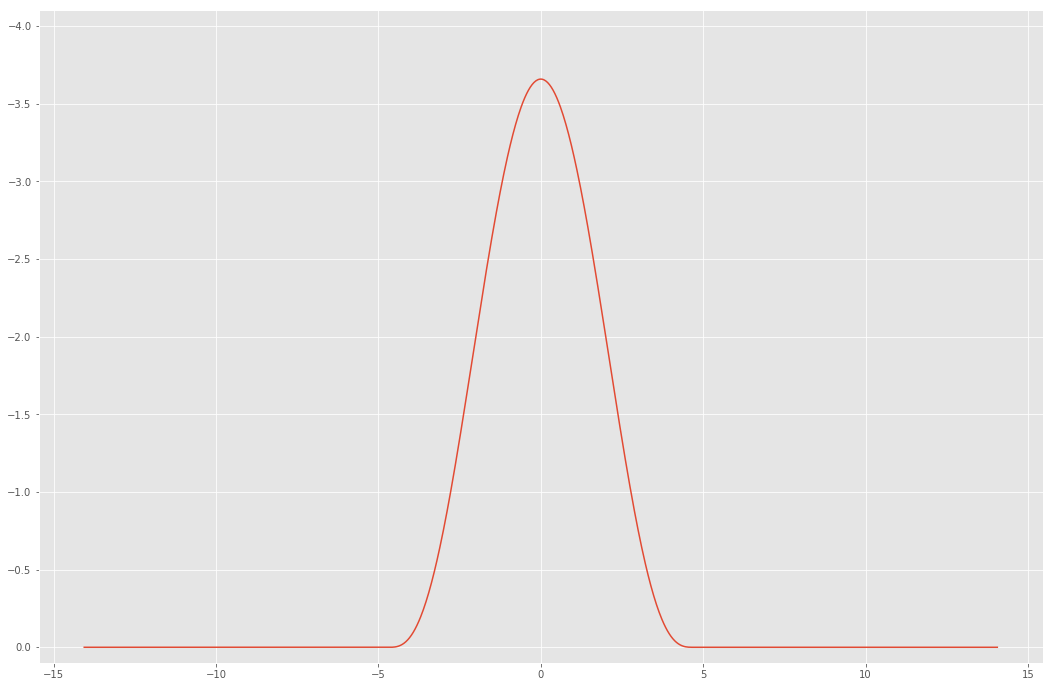

In [50]:
c = 4.685
support = np.linspace(-3*c, 3*c, 1000)
tukey = sm.robust.norms.TukeyBiweight(c=c)
plt.plot(support, tukey(support))
plt.ylim(.1, -4.1)

Полный список взвешивающих функций в модуле `statsmodels` можно найти [тут](http://statsmodels.sourceforge.net/stable/examples/notebook/generated/robust_models_1.html)

In [51]:
model_robust = sm.RLM(y_train, sm.add_constant(X_train), M=sm.robust.norms.TukeyBiweight())
model_robust = model_robust.fit()

In [52]:
model_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                  419
Model:                            RLM   Df Residuals:                      417
Method:                          IRLS   Df Model:                            1
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 02 May 2018                                         
Time:                        13:02:32                                         
No. Iterations:                     9                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.682e+04    241.555     69.628      0.000    1.63e+04    1.73e+04
x1            -0.0534      0.003    -20.962      0.000      -0.058      -0.048
==============================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

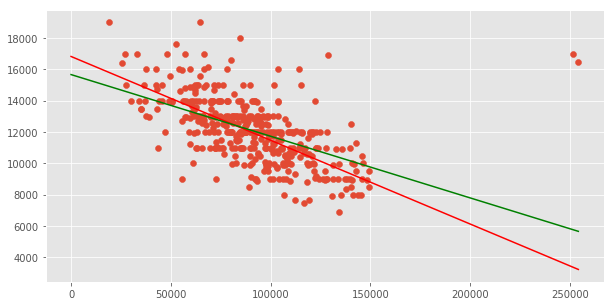

In [53]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = model_robust.predict(sm.add_constant(x))

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='red')
ax.plot(x, y_hat_outliers, c='green')

# Добавим остальные признаки в простую модель модель

In [54]:
df_train.head()

,price,mileage,year,trim,engine,transmission,kms
0,14995,67697,2006,ex,4 Cyl,Manual,108315.2
1,11988,73738,2006,ex,4 Cyl,Manual,117980.8
2,11999,80313,2006,lx,4 Cyl,Automatic,128500.8
3,12995,86096,2006,lx,4 Cyl,Automatic,137753.6
4,11333,79607,2006,lx,4 Cyl,Automatic,127371.2


Выполним предобработку признаков

In [59]:
def preprocess(df_input):
    
    df_output = df_input.copy()
    df_output = df_output.drop(['year', 'kms'], axis=1)
    
    df_output.loc[:, 'transmission'] = \
    df_output.transmission.replace({'Automatic': 0, 
                                   'Manual': 1})
    
    df_output.loc[:, 'engine'] = \
    df_output.engine.replace({'4 Cyl': 0, 
                             '6 Cyl': 1})
    
    
    df_output.loc[:, 'trim'] = df_input.loc[:, 'trim']\
                                      .replace({
                                          'ex': 0,
                                          'lx': 1,
                                          'exl':2
                                      })

        
    return df_output
    
    

In [60]:
df_train_preprocess = df_train.pipe(preprocess)
df_test_preprocess = df_test.pipe(preprocess)

Наконец-то научимся делать OHE

In [61]:
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [63]:
df_train_preprocess.head()

,price,mileage,trim,engine,transmission
0,14995,67697,0,0,1
1,11988,73738,0,0,1
2,11999,80313,1,0,0
3,12995,86096,1,0,0
4,11333,79607,1,0,0


In [64]:
X_train = df_train_preprocess.iloc[:, 1:].values
y_train = df_train_preprocess.iloc[:, 0].values

X_test = df_test_preprocess.iloc[:, 1:].values
y_test = df_test_preprocess.iloc[:, 0].values

In [65]:
one_hot = OneHotEncoder(categorical_features=[1]) # Так как мы видим, что столбец trim с категориальными признаками
one_hot.fit(X_train)
X_transf = one_hot.transform(X_train)

In [66]:
X_transf

<417x6 sparse matrix of type '<type 'numpy.float64'>'
	with 1048 stored elements in COOrdinate format>

In [68]:
X_transf.toarray() # Появилось 3 новых столбца в начале, столбец с trim удалился

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          6.76970000e+04,   0.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          7.37380000e+04,   0.00000000e+00,   1.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          8.03130000e+04,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          7.79970000e+04,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          6.18920000e+04,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.30340000e+04,   0.00000000e+00,   0.00000000e+00]])

In [69]:
# Собираем pipeline - сначала one-hot кодирование признаков, потом линейная регрессия

model = Pipeline([
    ('encoding', OneHotEncoder(categorical_features=[1])),
    ('lin_reg', LinearRegression()),
])

In [70]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('encoding', OneHotEncoder(categorical_features=[1], dtype=<type 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [71]:
y_hat = model.predict(X_test)

In [72]:
mean_absolute_error(y_test, y_hat)

1102.5423868712166